Data Project - Stock Market Analysis

1.) What was the change in price of the stock over time?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

In [3]:
aapl = pdr.get_data_stooq("AAPL",start,end)
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-09,180.87,180.93,177.01,178.19,60378492.0
2023-08-08,179.69,180.27,177.58,179.80,67823003.0
2023-08-07,182.13,183.13,177.35,178.85,97576069.0
2023-08-04,185.52,187.38,181.92,181.99,115956841.0
2023-08-03,191.57,192.37,190.69,191.17,62243282.0


In [4]:
aapl.describe()

,Open,High,Low,Close,Volume
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02
mean,158.679731,160.616518,156.900693,158.825823,7.819572e+07
std,16.388120,16.140227,16.570549,16.334911,2.546535e+07
min,126.010000,127.770000,124.170000,125.020000,3.145820e+07
25%,146.409750,148.029250,144.392250,146.600500,5.933756e+07
50%,158.019000,160.039000,154.693000,157.325000,7.484292e+07
75%,170.380000,172.389725,169.110500,171.148000,9.060820e+07
max,196.235000,198.230000,195.280000,196.450000,1.831590e+08


In [5]:
aapl.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-07,171.896,173.132,170.041,171.178,8.721239e+07
2022-01-06,171.636,174.289,170.650,171.008,9.746636e+07
2022-01-05,178.576,179.134,173.630,173.910,9.508628e+07
2022-01-04,181.576,181.885,178.087,178.665,9.988681e+07
2022-01-03,176.801,181.825,176.681,180.958,1.053089e+08


In [6]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402 entries, 2023-08-09 to 2022-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    402 non-null    float64
 1   High    402 non-null    float64
 2   Low     402 non-null    float64
 3   Close   402 non-null    float64
 4   Volume  402 non-null    float64
dtypes: float64(5)
memory usage: 18.8 KB


<Axes: xlabel='Date'>

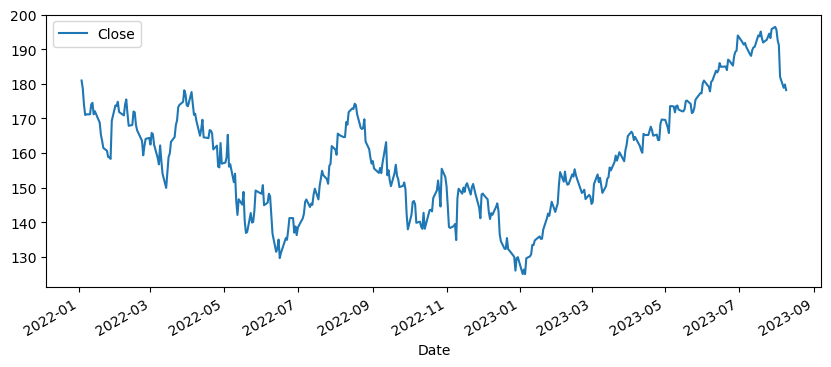

In [7]:
aapl['Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

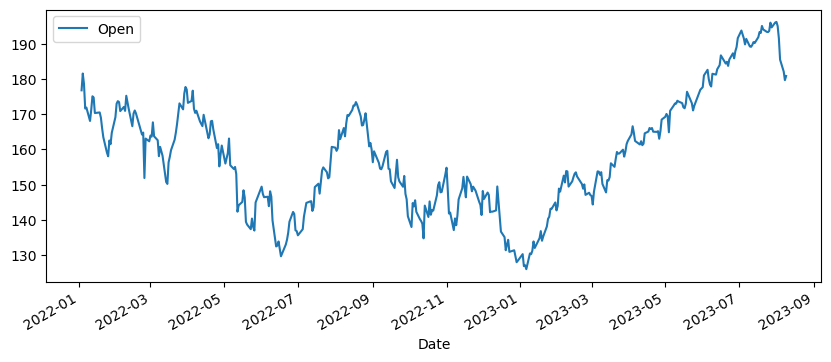

In [8]:
aapl['Open'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

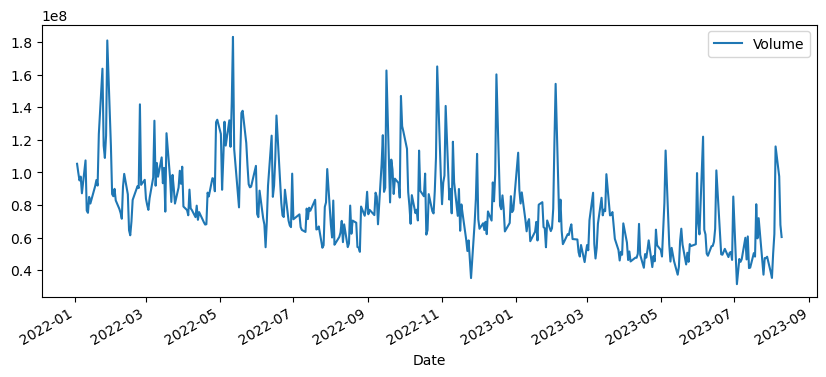

In [9]:
aapl['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    aapl[column_name] = aapl['Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

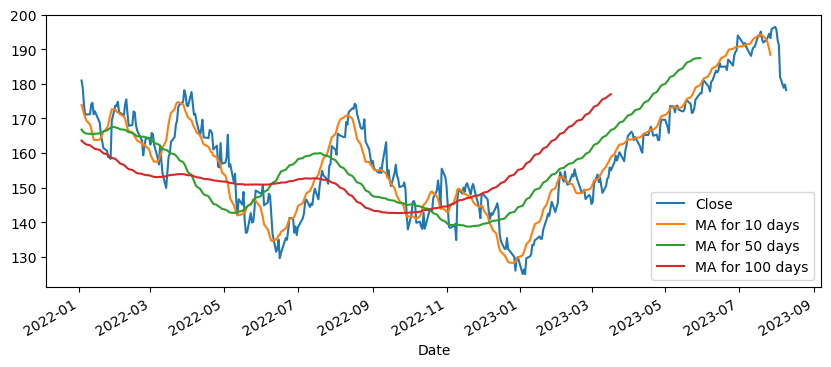

In [11]:
aapl[['Close','MA for 10 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

In [12]:
aapl['Daily Return'] = aapl.Close.pct_change()
aapl.head()

,Open,High,Low,Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,
2023-08-09,180.87,180.93,177.01,178.19,60378492.0,NaN,NaN,NaN,NaN
2023-08-08,179.69,180.27,177.58,179.80,67823003.0,NaN,NaN,NaN,0.009035
2023-08-07,182.13,183.13,177.35,178.85,97576069.0,NaN,NaN,NaN,-0.005284
2023-08-04,185.52,187.38,181.92,181.99,115956841.0,NaN,NaN,NaN,0.017557
2023-08-03,191.57,192.37,190.69,191.17,62243282.0,NaN,NaN,NaN,0.050442


<Axes: xlabel='Date'>

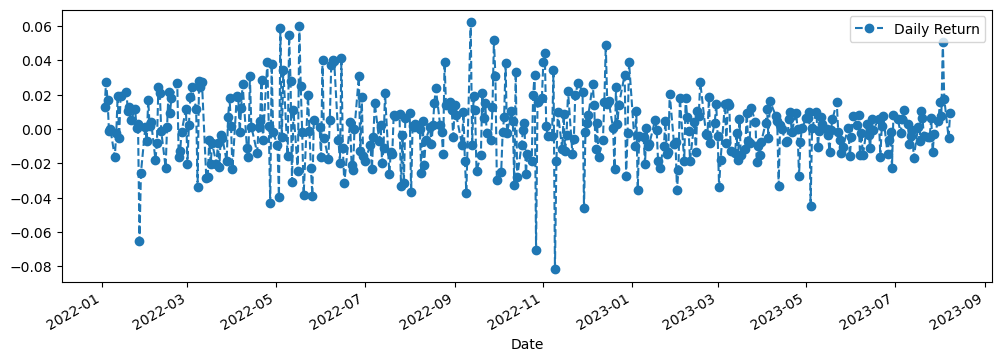

In [13]:
aapl['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

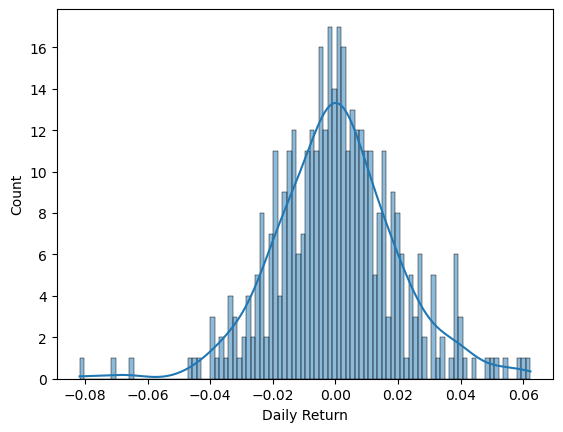

In [14]:
sns.histplot(data=aapl,x=aapl['Daily Return'].dropna(),bins=100,kde=True)

In [15]:
closing_df = pdr.get_data_stooq(['AAPL','GOOG','MSFT','AMZN'],start,end)['Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-08-09,178.19,130.15,322.23,137.85
2023-08-08,179.80,131.84,326.05,139.94
2023-08-07,178.85,131.94,330.11,142.22
2023-08-04,181.99,128.54,327.78,139.57
2023-08-03,191.17,128.77,326.66,128.91


In [16]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-08-09,178.19,130.15,322.23,137.85
2023-08-08,179.80,131.84,326.05,139.94
2023-08-07,178.85,131.94,330.11,142.22
2023-08-04,181.99,128.54,327.78,139.57
2023-08-03,191.17,128.77,326.66,128.91


In [17]:
tech_pect = closing_df.pct_change()

In [18]:
tech_pect

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-08-09,NaN,NaN,NaN,NaN
2023-08-08,0.009035,0.012985,0.011855,0.015161
2023-08-07,-0.005284,0.000758,0.012452,0.016293
2023-08-04,0.017557,-0.025769,-0.007058,-0.018633
2023-08-03,0.050442,0.001789,-0.003417,-0.076377
...,...,...,...,...
2022-01-07,-0.000117,-0.011330,-0.000732,0.006614
2022-01-06,-0.000993,0.003993,-0.000511,0.004306
2022-01-05,0.016970,0.000749,0.007982,0.006756


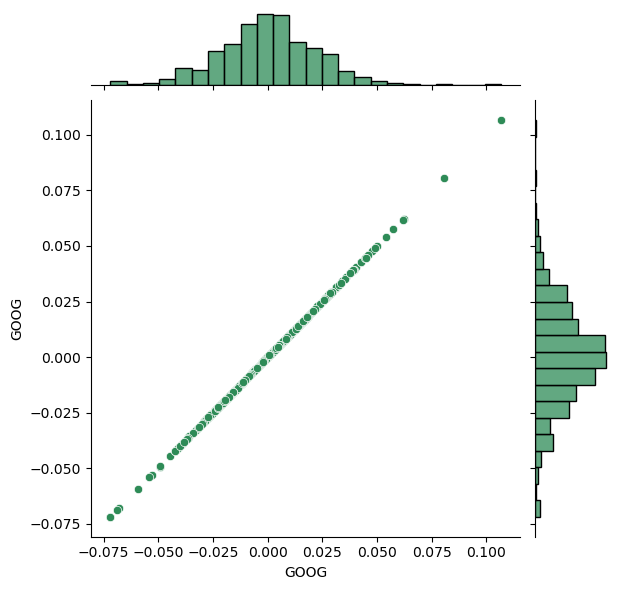

In [19]:
sns.jointplot(data=tech_pect,x='GOOG',y='GOOG',kind='scatter',color='seagreen')

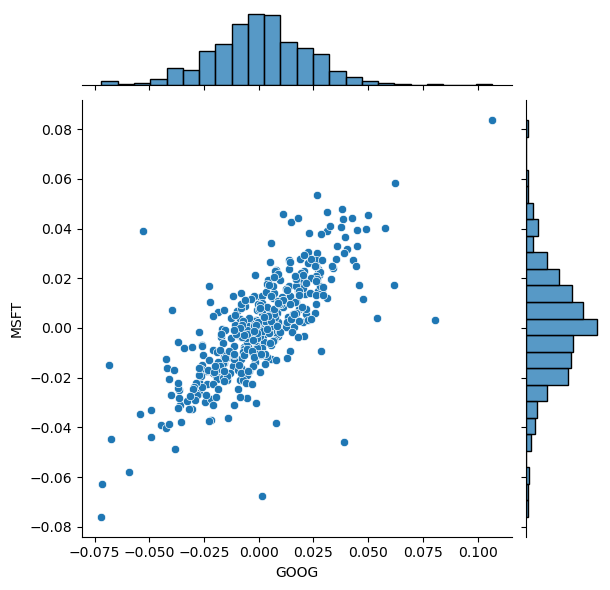

In [20]:
sns.jointplot(data=tech_pect,x='GOOG',y='MSFT',kind='scatter')

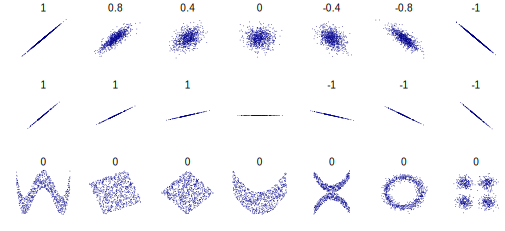

In [21]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

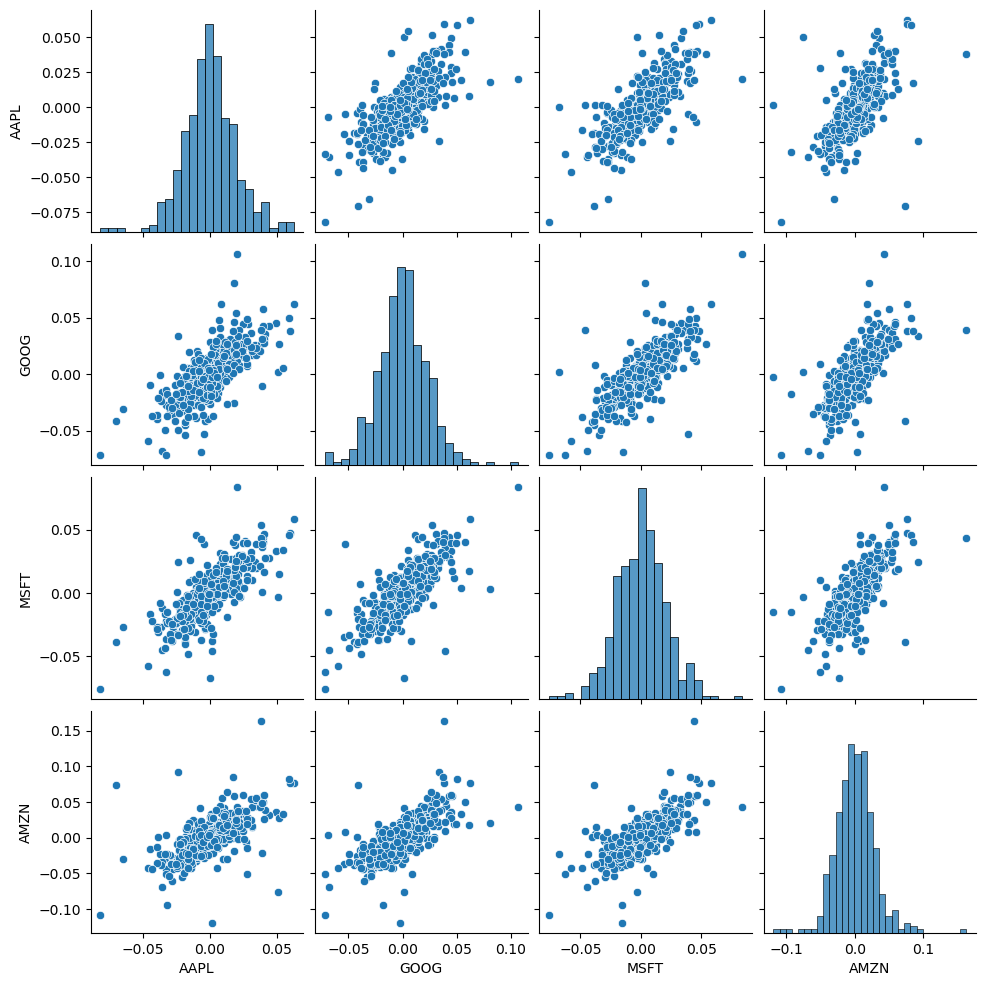

In [22]:
sns.pairplot(tech_pect.dropna())

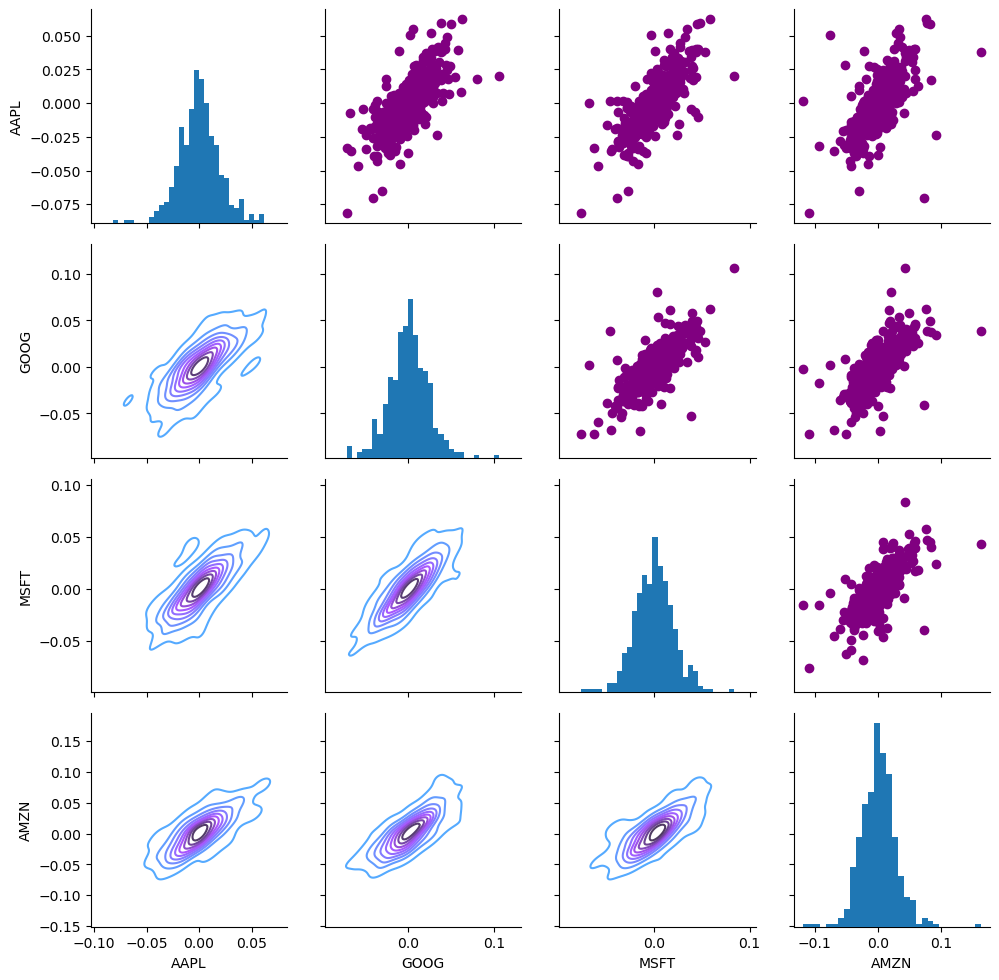

In [23]:
return_fig = sns.PairGrid(tech_pect)
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

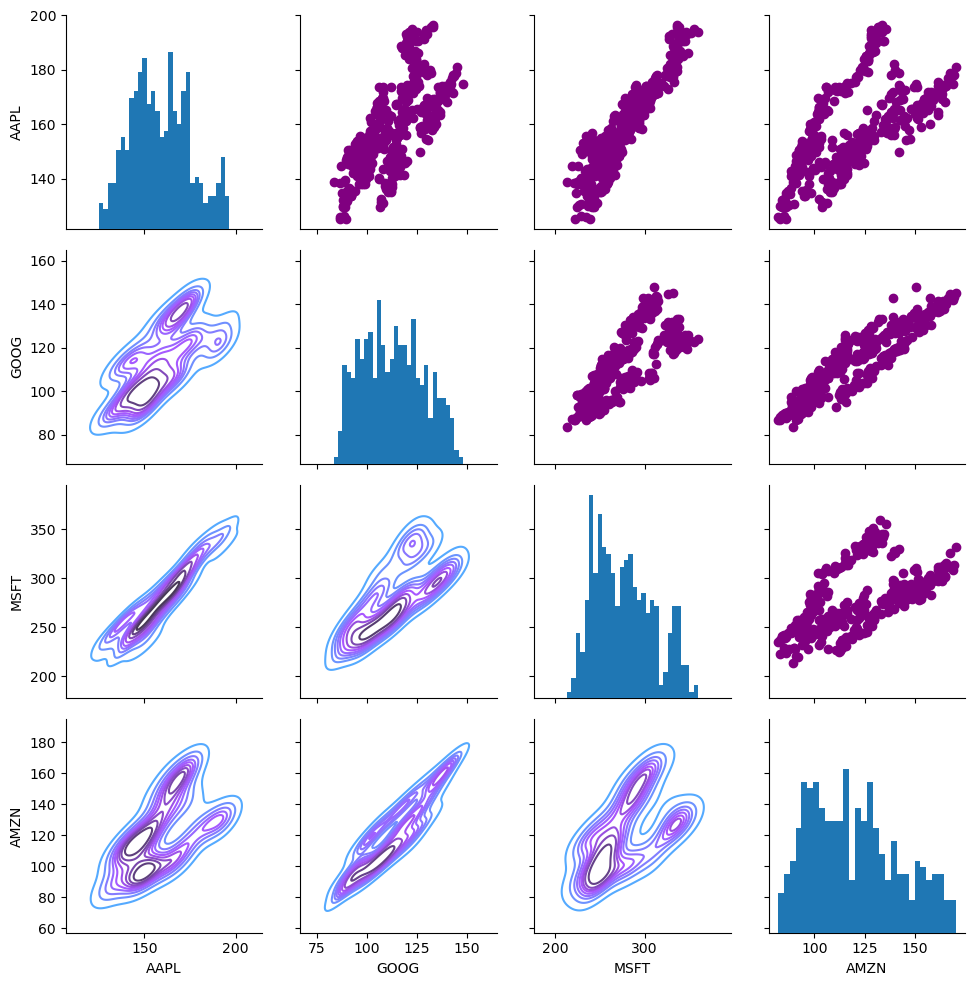

In [24]:
return_close = sns.PairGrid(closing_df)
return_close.map_upper(plt.scatter,color='purple')
return_close.map_lower(sns.kdeplot,cmap='cool_d')
return_close.map_diag(plt.hist,bins=30)

<Axes: xlabel='Symbols', ylabel='Symbols'>

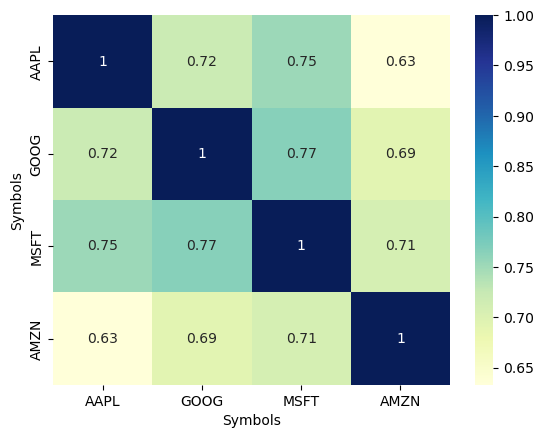

In [25]:
sns.heatmap(tech_pect.corr(),cmap="YlGnBu",annot=True)

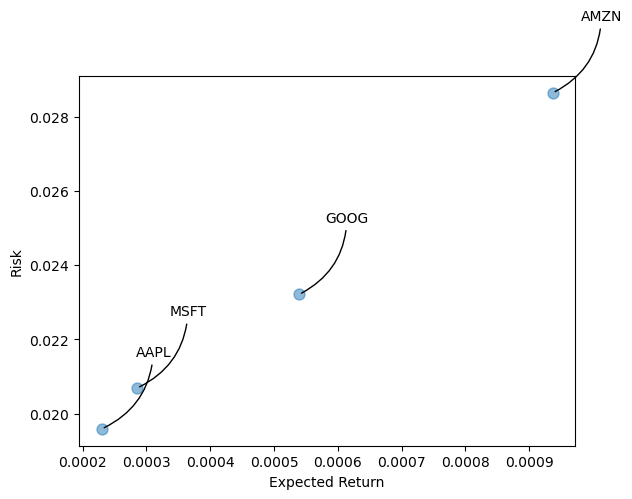

In [26]:
pect = tech_pect.dropna()
area = np.pi*20
plt.scatter(pect.mean(),pect.std(),alpha=0.5,s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(pect.columns,pect.mean(),pect.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',
                 ha='right',va='bottom',arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

<Axes: xlabel='Daily Return', ylabel='Count'>

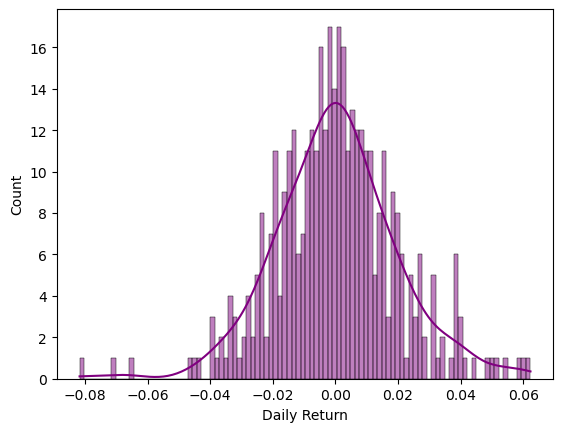

In [27]:
sns.histplot(data=aapl['Daily Return'],bins=100,color='purple',kde=True)

In [28]:
pect['AAPL'].quantile(0.05)

-0.030934864280697916

In [29]:
goog = pdr.get_data_stooq("GOOG",start,end)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-09,132.19,132.47,129.505,130.15,17745218
2023-08-08,130.98,131.94,130.130,131.84,16835952
2023-08-07,129.51,132.06,129.430,131.94,17621041
2023-08-04,129.60,131.93,128.315,128.54,20521852
2023-08-03,128.37,129.77,127.775,128.77,15086132


In [30]:
days = 365
dt = 1/days
mu = pect.mean()['GOOG']
sigma = pect.std()['GOOG']

In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

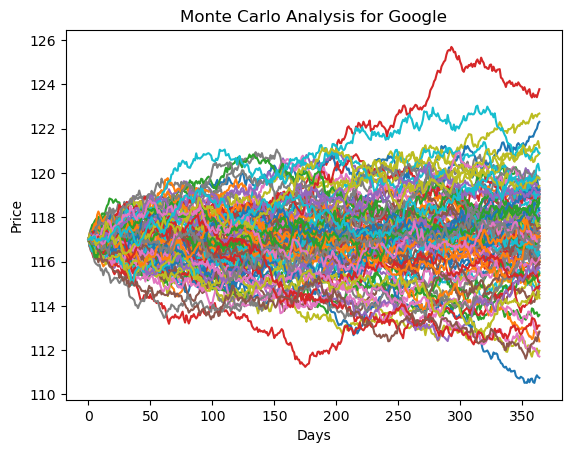

In [32]:
start_price = 117

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [33]:
runs = 10000
simulations = np.zeros(runs)
np.printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days - 1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

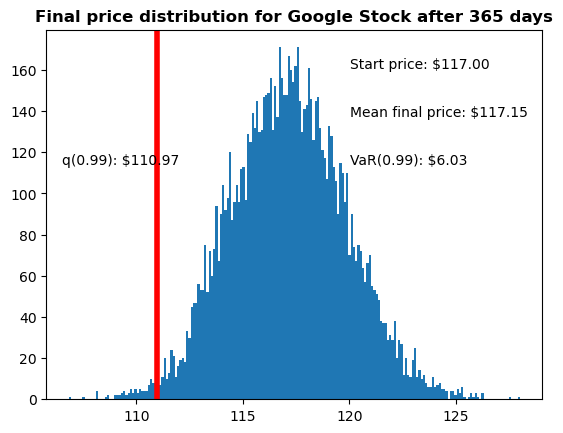

In [34]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s='Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7,s='Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q))
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution for Google Stock after %s days" %days, weight='bold')